In [21]:
import numpy as np
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
...

Ellipsis

In [22]:
!pip install tensorflow


In [23]:
import tensorflow as tf

In [24]:
import numpy as np
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
...

Ellipsis

In [25]:
...
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [26]:
...
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


In [27]:
...
# Summarize number of classes
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


Review length: 
Mean 234.76 words (172.911495)


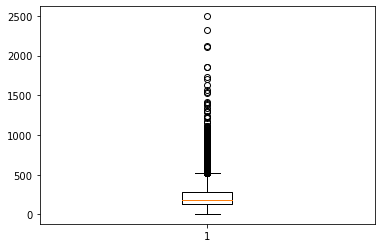

In [28]:
...
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [29]:
...
imdb.load_data(nb_words=5000)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

In [31]:
...
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [32]:
...
Embedding(5000, 32, input_length=500)

In [33]:
# MLP for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           160000    
                                                                 
 flatten_4 (Flatten)         (None, 16000)             0         
                                                                 
 dense_8 (Dense)             (None, 250)               4000250   
                                                                 
 dense_9 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
196/196 - 16s - loss: 0.4516 - accuracy: 0.7690 - val_loss: 0.2924 - val_accuracy: 0.8761 - 16s/epoch - 79ms/step
Epoch 2/2
196/196 - 14s - loss: 0.1632 - accuracy: 0

In [34]:
import numpy

In [35]:
actual = numpy.random.binomial(1, 0.9, size = 5000)
predicted = numpy.random.binomial(1, 0.9, size = 5000)

In [36]:
from sklearn import metrics

In [37]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [38]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [39]:
import matplotlib.pyplot as plt

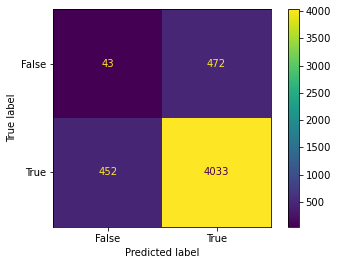

In [40]:
cm_display.plot()
plt.show()

782/782 [==============================] - 5s 6ms/step


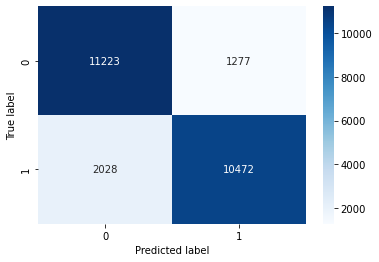

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------

In [56]:
# preprocess the test data
X_test = tokenizer.texts_to_sequences(test_data)
X_test = pad_sequences(X_test, maxlen=max_length)


NameError: name 'test_data' is not defined

In [57]:
import numpy as np

# convert X_test to a NumPy array
X_test = np.array(X_test)

# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# print the accuracy
print('Test accuracy:', accuracy)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [45]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# map integer sequences to their corresponding words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

# create a tokenizer for the text
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts([decoded_review])

# define a new review
new_review = "This movie was great! I really enjoyed it."

# convert the review to an integer sequence
new_review_seq = tokenizer.texts_to_sequences([new_review])

# pad the sequence to a fixed length
max_review_length = 500
new_review_seq = pad_sequences(new_review_seq, maxlen=max_review_length)

# make a prediction using the model
model.predict(new_review_seq)



1/1 [==============================] - 0s 29ms/step


array([[0.59927183]], dtype=float32)

In [50]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# load the IMDB dataset
imdb = tensorflow.keras.datasets.imdb


import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# load the IMDB dataset
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# load the word index
word_index = imdb.get_word_index()

# prepare a new review for prediction
new_review = "This movie was great! I really enjoyed it."
# tokenize and pad the new review
tokenizer = Tokenizer(num_words=10000)
tokenizer.word_index = {k:(v+3) for k,v in word_index.items()}
tokenizer.word_index["<PAD>"] = 0
tokenizer.word_index["<START>"] = 1
tokenizer.word_index["<UNK>"] = 2
sequence = tokenizer.texts_to_sequences([new_review])
padded_sequence = pad_sequences(sequence, maxlen=100)

# predict the sentiment score for the new review
score = model.predict(padded_sequence)[0][0]
# round the score to the nearest integer and get the predicted sentiment
sentiment = "positive" if np.round(score) == 1 else "negative"

print("Review:", new_review)
print("Sentiment score:", score)
print("Predicted sentiment:", sentiment)


NameError: name 'tensorflow' is not defined